# Imports + data loading

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import anndata as ad
plt.rcParams['figure.figsize'] = (7, 7)
from scipy.stats import median_abs_deviation

In [2]:
adata = sc.read("/home/p/pohll/Downloads/aged_bleomycin(1).h5ad")

# new PCA, UMAP, and Leiden or use their clustering 0.3/0.6?

In [ ]:
sc.tl.leiden(adata)

In [ ]:
sc.tl.leiden(adata, key_added="leiden_res0_1", resolution=0.1)
sc.tl.leiden(adata, key_added="leiden_res0_25", resolution=0.25)
sc.tl.leiden(adata, key_added="leiden_res0_5", resolution=0.5)
sc.tl.leiden(adata, key_added="leiden_res1", resolution=1.0)

# Annotation 

In [3]:
all_marker_genes = {
  "AT1": ["S100a6", "Ager", "Pdpn", "Vegfa"],
  "AT2": ["Muc1", "Sftpc", "Sftpd", "Cxcl15", "Lcn2"],
  "Transitioning epithelial": ["Krt8", "Krt18"],
  "Epithelial": ["Epcam", "Cdh1"],
  "Alveolar macrophages": ["Marco", "Chil3", "Fabp4", "Siglecf", "Il18", "Ear1", "Fabp1", "Car4", "Ctsk", "Chil3", "S100a1", "Wfdc21", "Itgam", "Cd36", "Gpnmb", "Litaf", "Jund", "Bhlhe40", "Bhlhe41", "Klf9", "Atf3", "Atf4"],
  "Interstitial macrophages": ["Trem2", "C1qa"],
  "Classical monocytes": ["F13a1", "Ly6c2"],
  "Non-classical monocytes": ["Treml4", "Fcgr3"],
  "Dendritic cells": ["Clec9a", "H2-Aa"],
  "Dendritic cells pDC": ["Siglech", "Clec4b1"],#  Clec4b1 instead of Clec4c
  "Dendritic cells Ccr7-hi": ["Ccr7"],
  "CD4 T-cells": ["Cd4", "Cd3e", "Cd3d"],
  "CD8 T-cells": ["Cd8a", "Cd3d"],
  "NK cells": ["Tyrobp", "Gzma", "Nkg7"],
  "B-cells": ["Cd79a", "Cd19", "Ms4a1"],
  "Neutrophils": ["S100a8", "S100a9"],
  "Endothelial": ["Pecam1", "Ly6c1"], # Pecam1 instead of Pecam4
  "Lymphatic endothelial": ["Pdpn"],
  "Aerocytes": ["Car4", "Ednrb"],
  "Pericytes": ["Vtn", "Mcam", "Cspg4"],
  "Lipofibroblasts": ["Plin2", "Lpl", "Tcf21"],
  "Myofibroblasts": ["Cthrc1", "Spp1", "Pdgfra", "Col3a1", "Postn", "Tnc", "S100a6", "Ccl2"],
  "Alveolar fibroblast": ["Npnt", "Ces1d", "Slc7a10"],
  "Adventitial fibroblast": ["Pi16", "Dcn", "Il33", "Ccl11", "Adh7"],
  "Peribronchial fibroblasts": ["Hhip", "Aspn", "Fgf18", "Lgr5", "Lgr6"],
  "SMCs": ["Acta2", "Tagln", "Myh11"]
}

## Dotplot 

/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


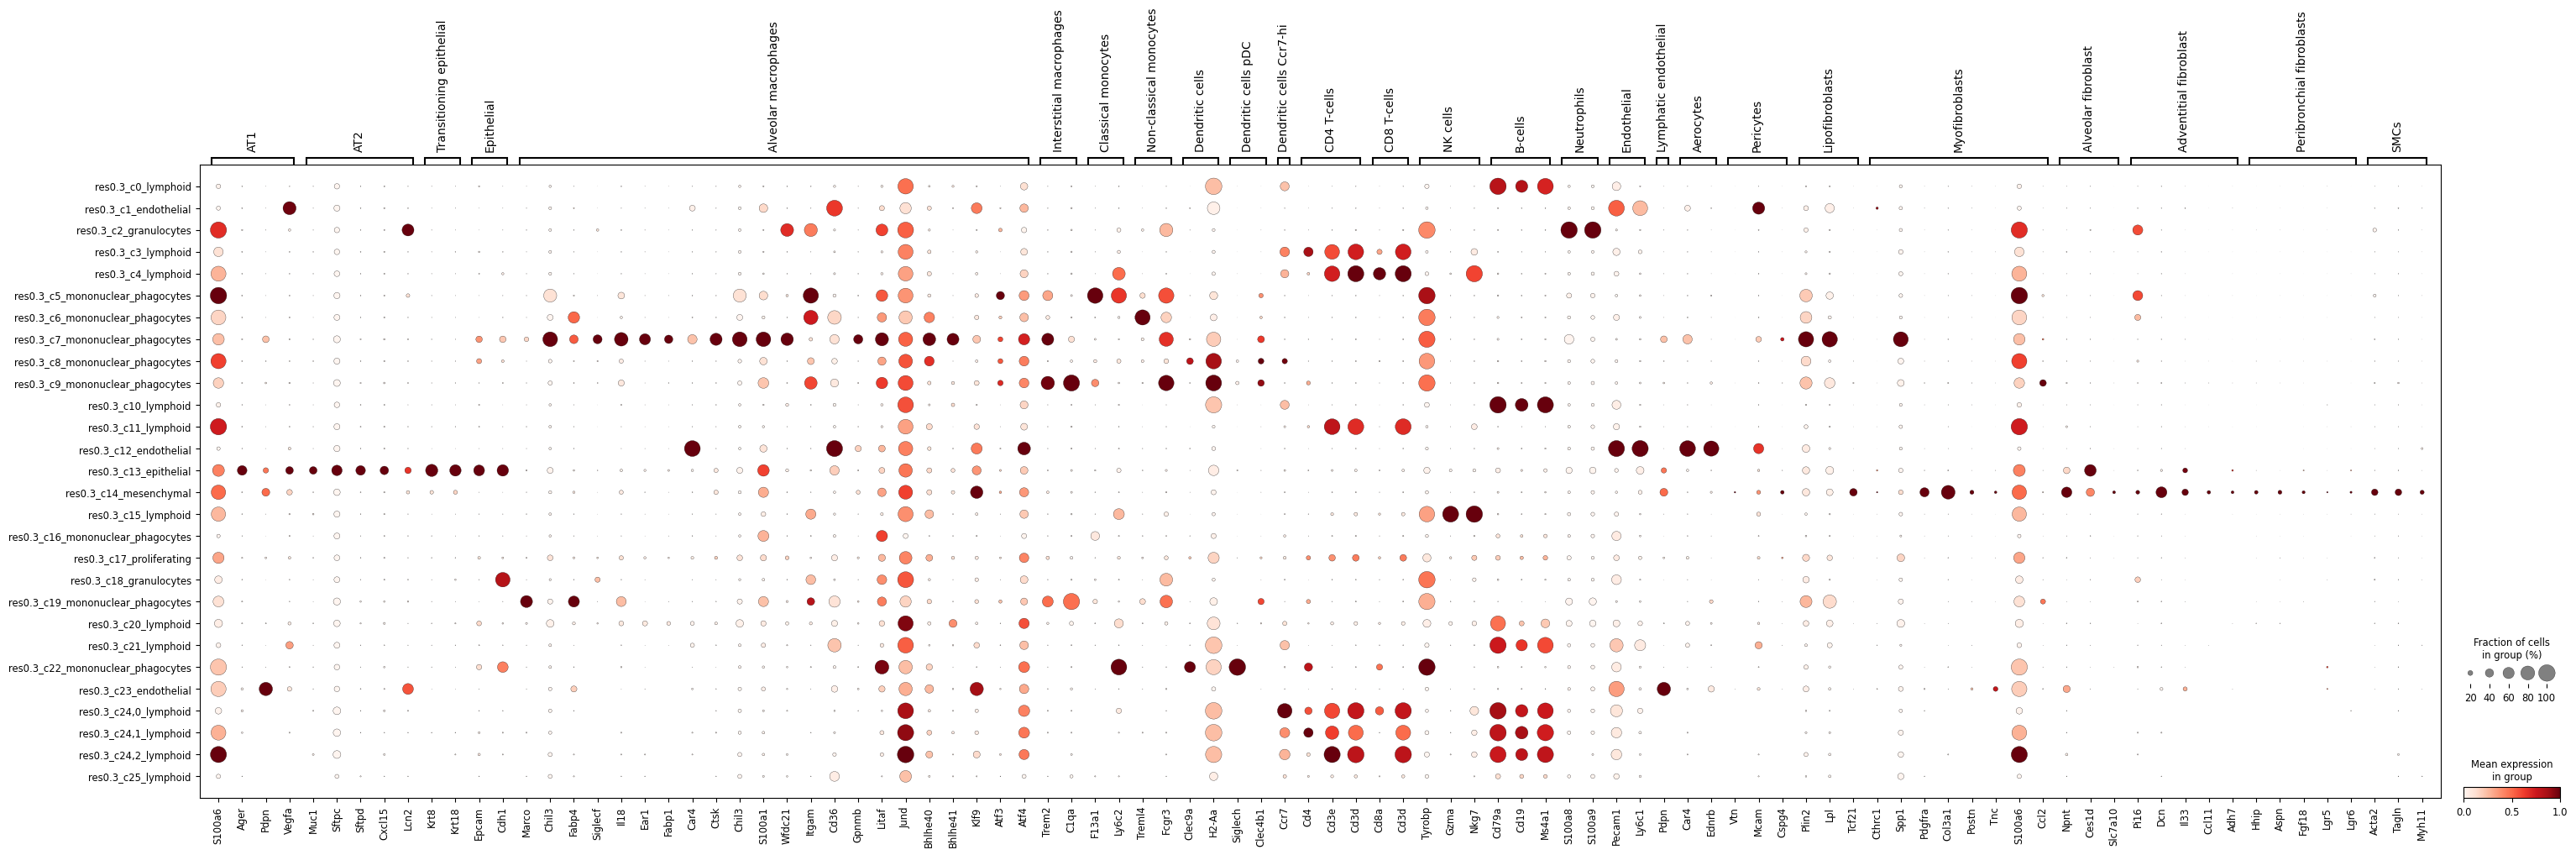

In [42]:
sc.pl.dotplot(adata, all_marker_genes, groupby=['leiden_res0.3', "CELL_celltype_compartment"],  standard_scale="var")


/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


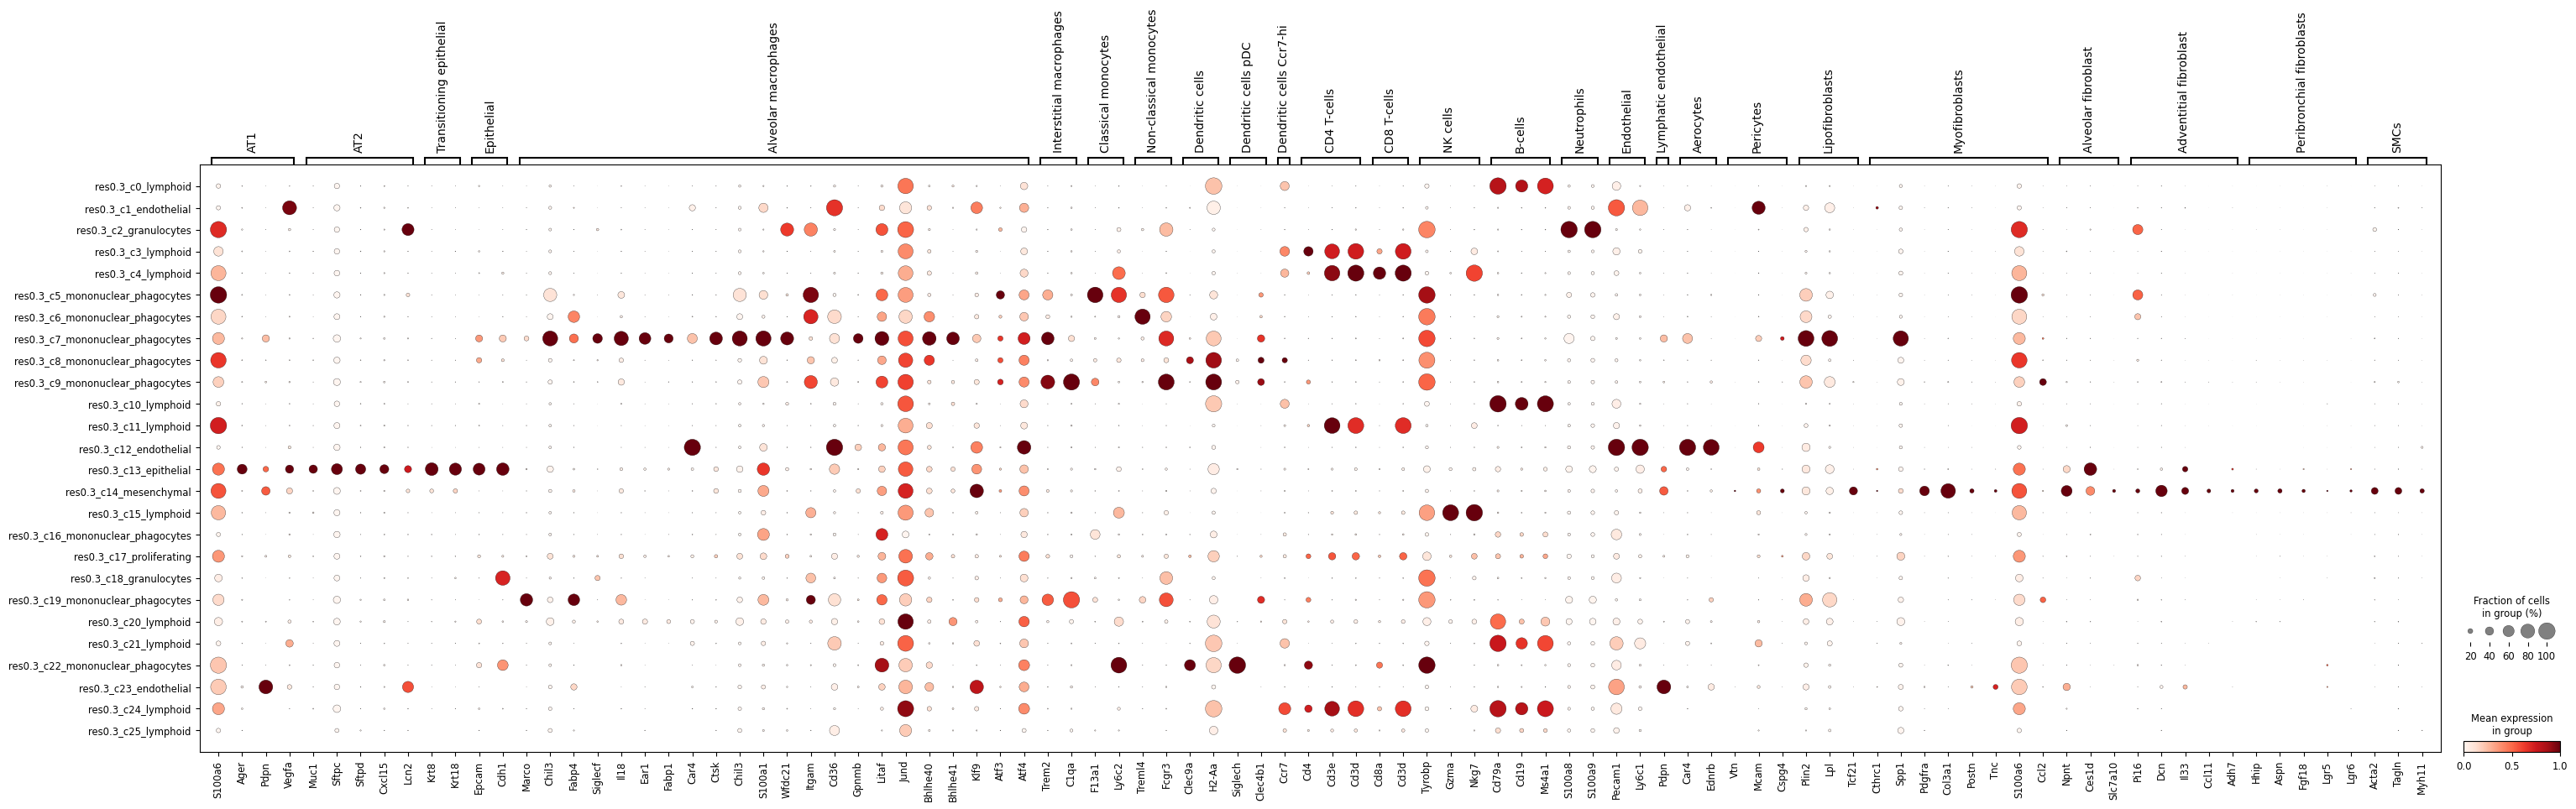

In [57]:
sc.pl.dotplot(adata, all_marker_genes, groupby=['clust_res0.3', "CELL_celltype_compartment"],  standard_scale="var")


/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


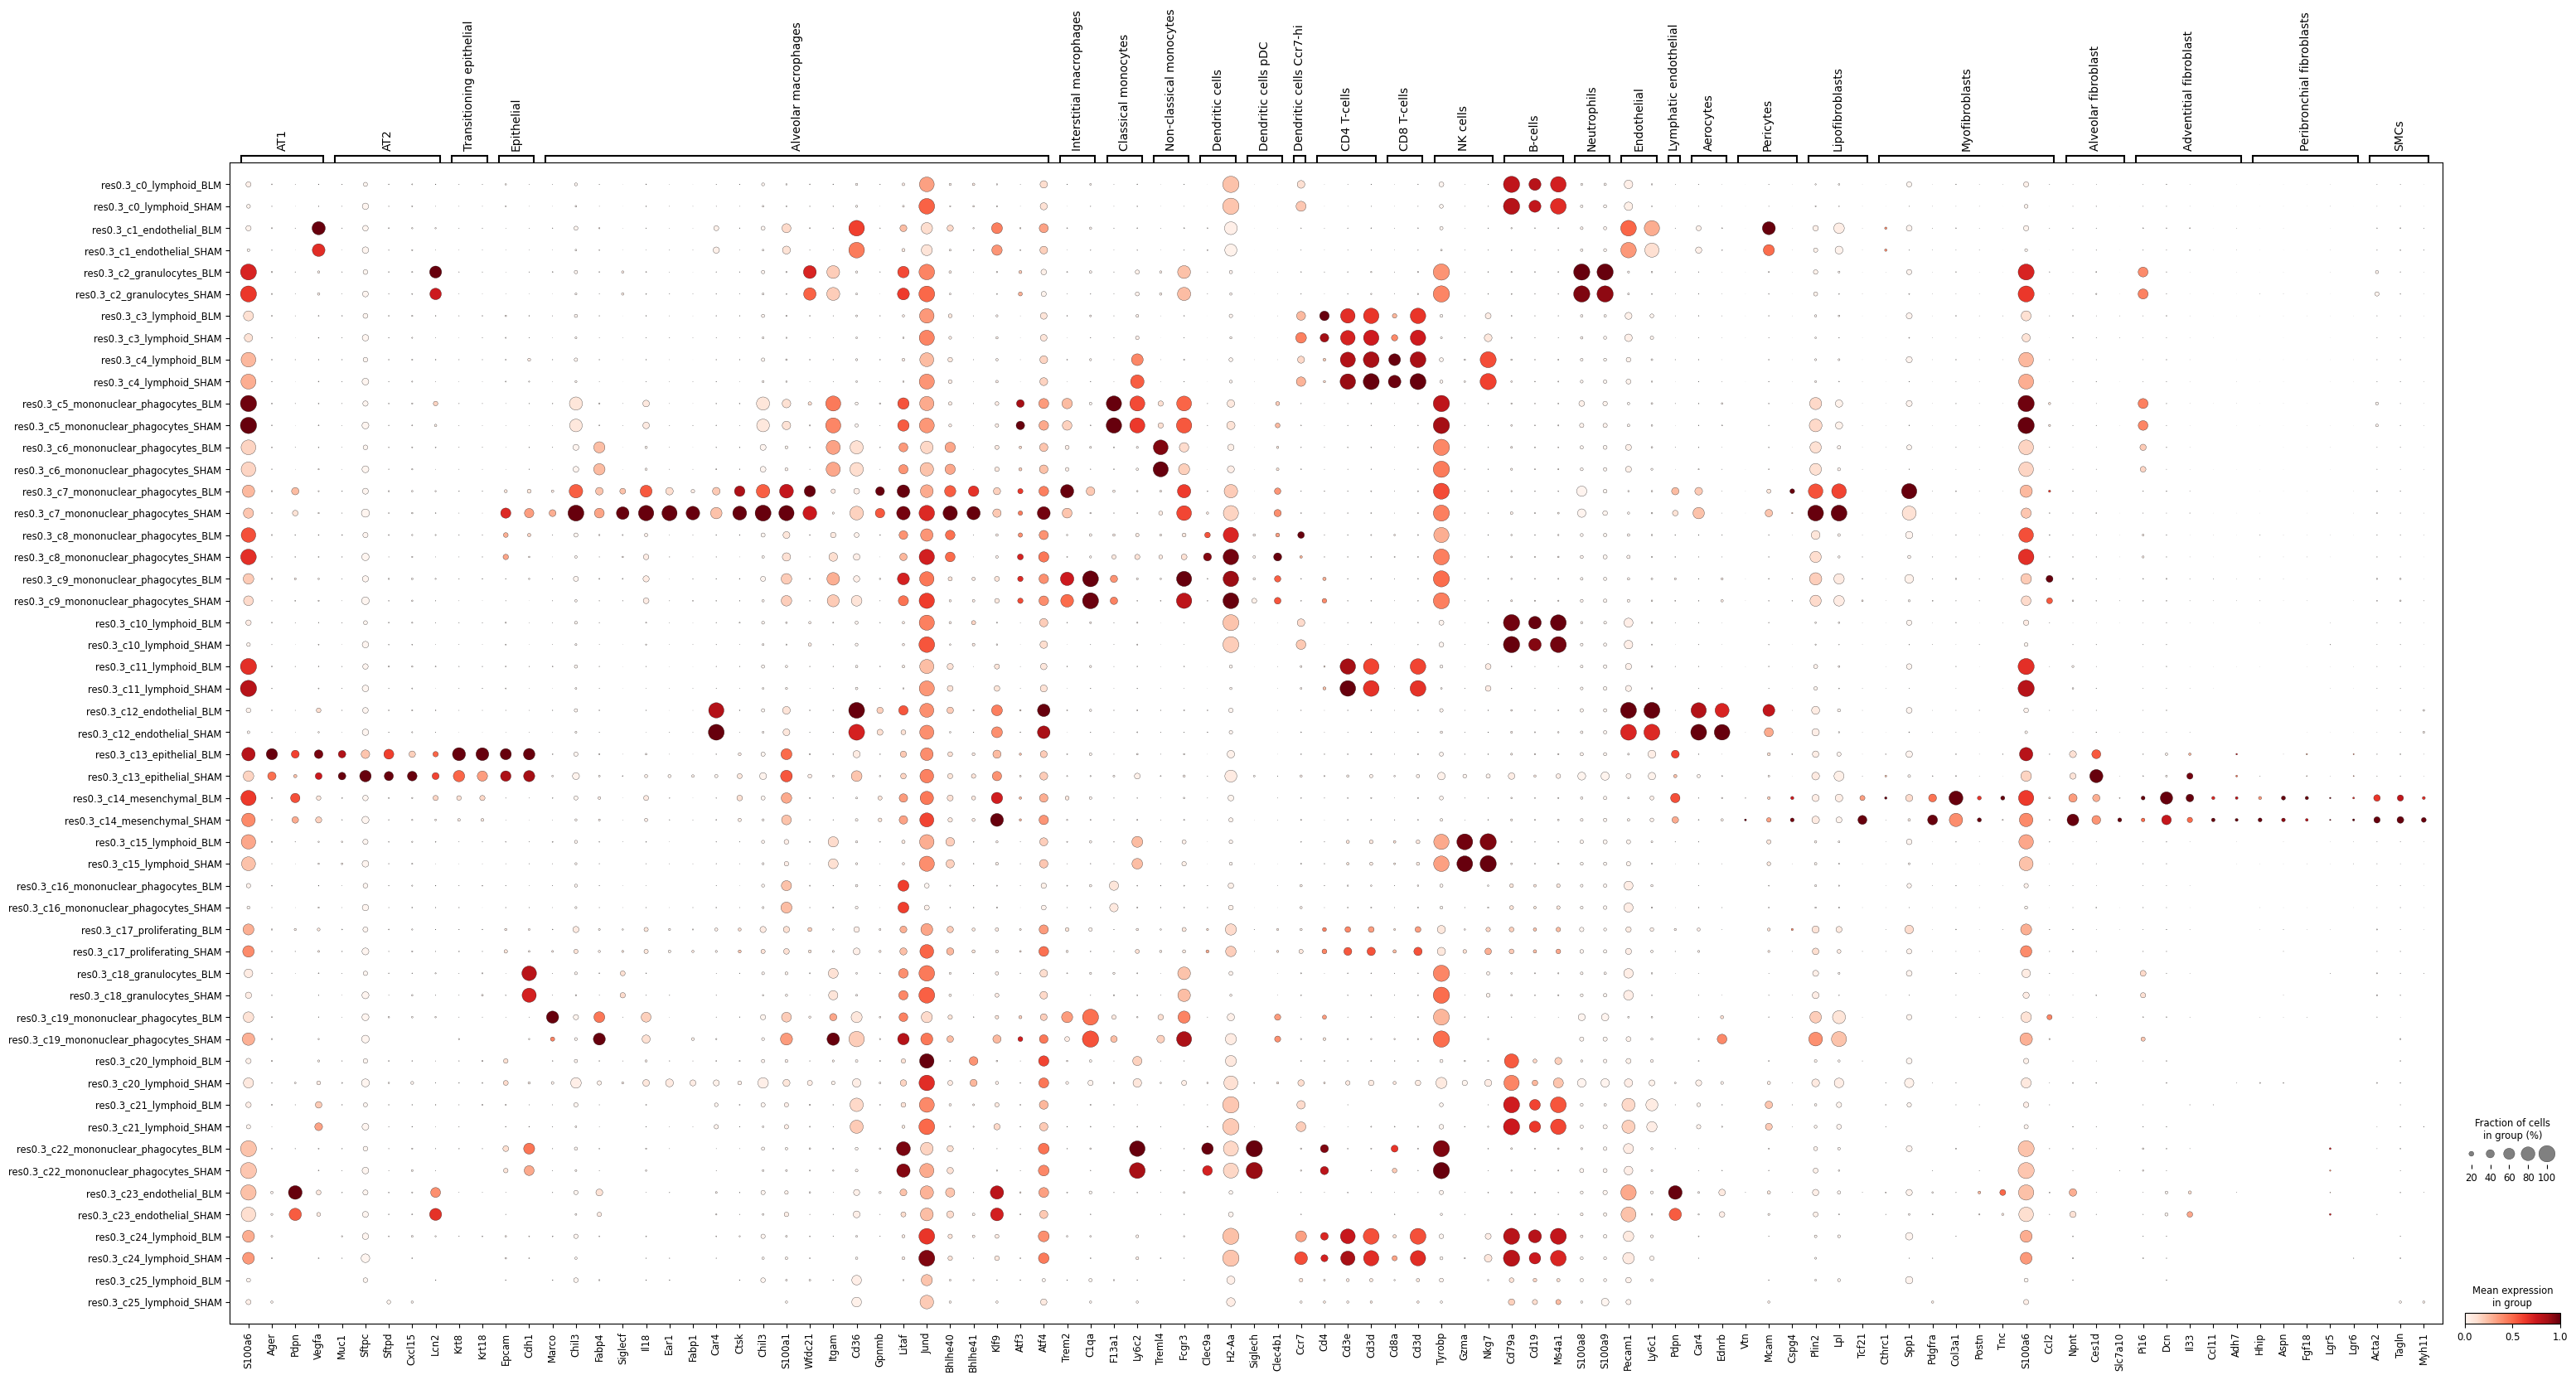

In [53]:
sc.pl.dotplot(adata, all_marker_genes, groupby=['leiden_res0.3', "CELL_celltype_compartment","SAMP_condition" ],  standard_scale="var")


In [25]:
adata


AnnData object with n_obs × n_vars = 110761 × 22348
    obs: 'SAMP_ID', 'Row.names', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'ambient_RNA', 'percent_mito', 'percent_ribo', 'S.Score', 'G2M.Score', 'Phase', 'DF_doublet_score', 'DF_call_10pct', 'DF_call_1pct', 'DF_prediction', 'PROJ_bioinf_id', 'PROJ_glpg_id', 'PROJ_area', 'PROJ_species', 'PROJ_tissue', 'PROJ_tissue_detail', 'PROJ_biological_system', 'SAMP_subject_ID', 'SAMP_condition', 'SAMP_treatment', 'SAMP_stage', 'SAMP_exp_group', 'SAMP_sex', 'macrogen_sample_no', 'tube_ID', 'cell_count', 'library_Conc', 'library_size', 'SC_prep', 'treatment', 'perc_BW_change', 'pseudo_AS_score', 'MitochondrialRatio', 'RibosomalRatio', 'nCount_SCT', 'nFeature_SCT', 'clust_res0.3', 'clust_res0.6', 'CELL_celltype_compartment', 'ident', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_count

## rank_genes_groups

- look at cluster 25, 16, 17, 14 

In [24]:
sc.tl.rank_genes_groups(
    adata, layer="logcounts",  groupby="clust_res0.3", method="wilcoxon", key_added="dea_clust_res0.3"
)

/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/tools/_ran

/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


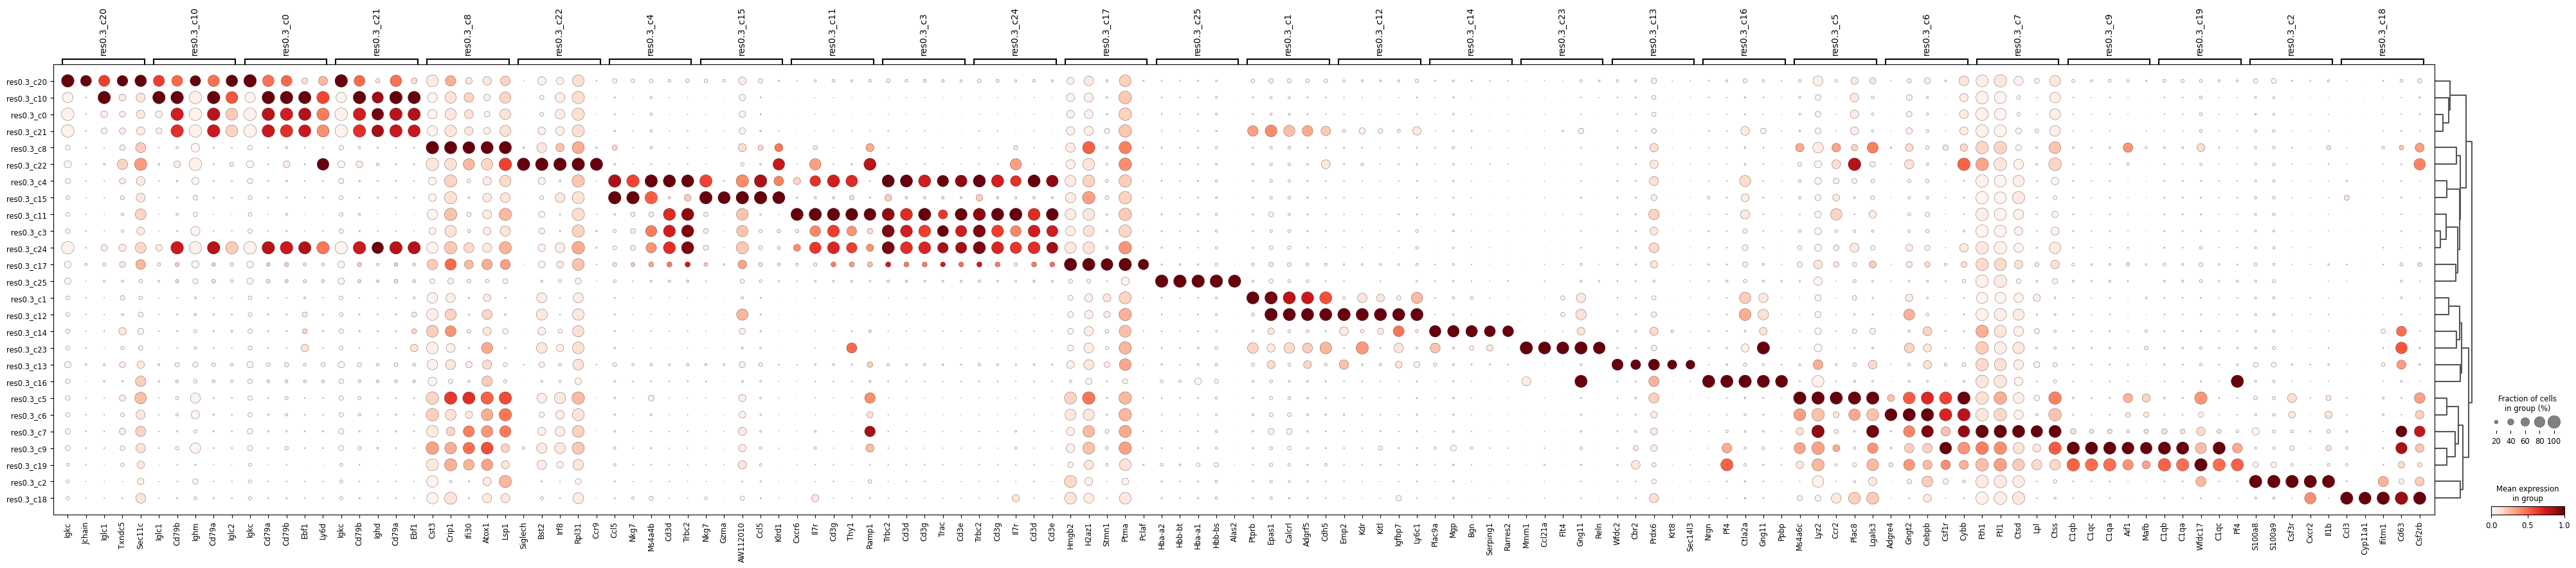

In [54]:
sc.pl.rank_genes_groups_dotplot(
    adata, groupby="clust_res0.3", standard_scale="var", n_genes=5, key="dea_clust_res0.3"
)

- c25:
- c16
- c17
- c14 

## subcluster 

/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


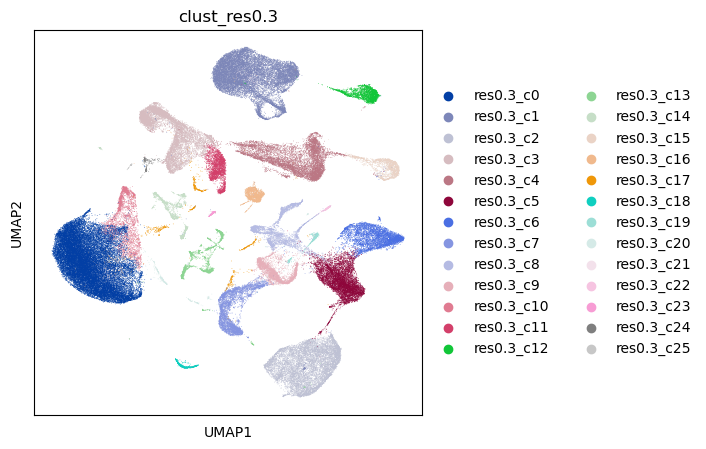

In [49]:
sc.pl.umap(adata, color="clust_res0.3")

In [58]:
sc.pp.neighbors(adata, n_pcs=30)

### subcluster c24 again using restrict_to  

In [ ]:
# cluster xluster 24 again usong restrict_to  

sc.tl.leiden(adata, restrict_to= ("clust_res0.3", ['res0.3_c24']),  key_added="leiden_res0.3", resolution=0.3 )


In [ ]:
plt.rcParams['figure.figsize'] = (5, 5)

In [ ]:
sc.pl.umap(adata, color=[ "leiden_res0.3", "DF_prediction"])

- Cluster 24: small cluster, B and T cells do not seperate even when divided into 3 subclusters in marker genes dotplot
- also some doublets in this cluster 
- -->  keep them as "Lymphoid cells 

In [ ]:
adata.obs["leiden_res0.3"] = adata.obs["leiden_res0.3"].replace("res0.3_c24,0", "res0.3_c24")
adata.obs["leiden_res0.3"] = adata.obs["leiden_res0.3"].replace("res0.3_c24,1", "res0.3_c24")
adata.obs["leiden_res0.3"] = adata.obs["leiden_res0.3"].replace("res0.3_c24,2", "res0.3_c24")


## final annotation 

In [30]:
manual_anno_res0_3 = {'res0.3_c0':"B-cells",
                      'res0.3_c1': "Endothelial", 
                      'res0.3_c2': "Neutrophils",
                      'res0.3_c3': "CD4 T-cells",
                      'res0.3_c4': "CD8 T-cells",
                      'res0.3_c5': "Classical monocytes",
                      'res0.3_c6': "Non-classical monocytes",
                      'res0.3_c7': "Alveolar macrophages",
                      'res0.3_c8': "Dendritic cells", 
                      'res0.3_c9': "Interstitial macrophages",
                      'res0.3_c10': "B-cells",
                      'res0.3_c11': "T-cells",
                      'res0.3_c12': "Aerocytes",
                      'res0.3_c13': "Epithelial", 
                      'res0.3_c14': "Fibroblasts", # Mesynchimal, fibroblast /myofibroblasts
                      'res0.3_c15': "NK cells",
                      'res0.3_c16': "NA", #?
                      'res0.3_c17': "NA", #? 
                      'res0.3_c18': "Granulocytes", #  granolocytes? 
                      'res0.3_c19': "Interstitial macrophages",
                      'res0.3_c20': "B-cells", # b cells? 
                      'res0.3_c21': "B-cells",
                      'res0.3_c22': "Dendritic cells",
                      'res0.3_c23': "Endothelial", 
                      'res0.3_c24': "Lymphoid cells",# cluster again --> still mixed t and b cells 
                      'res0.3_c25':"NA"}

In [31]:
adata.obs["manual_celltype_annotation"] = adata.obs["clust_res0.3"].map(manual_anno_res0_3).astype("category")

/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


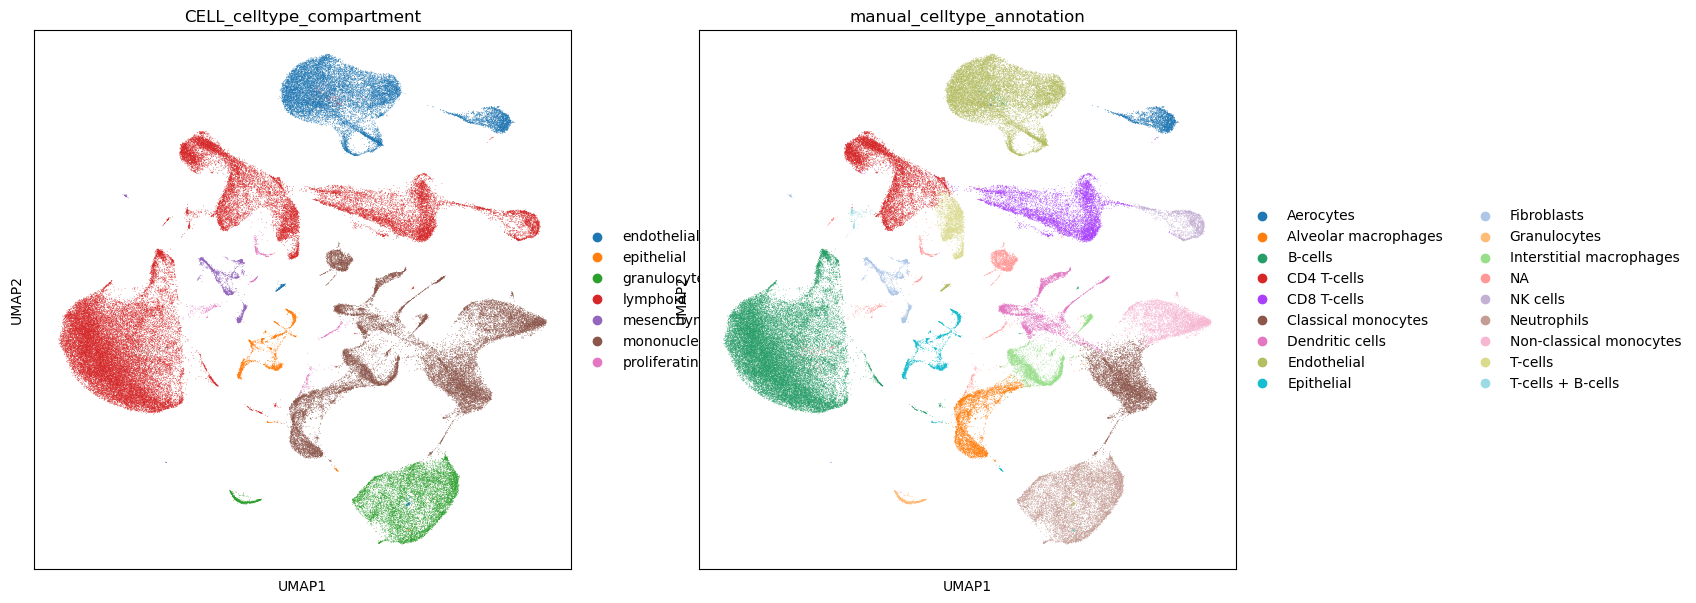

In [32]:
sc.pl.umap(adata, color=[ "CELL_celltype_compartment", "manual_celltype_annotation"])

/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


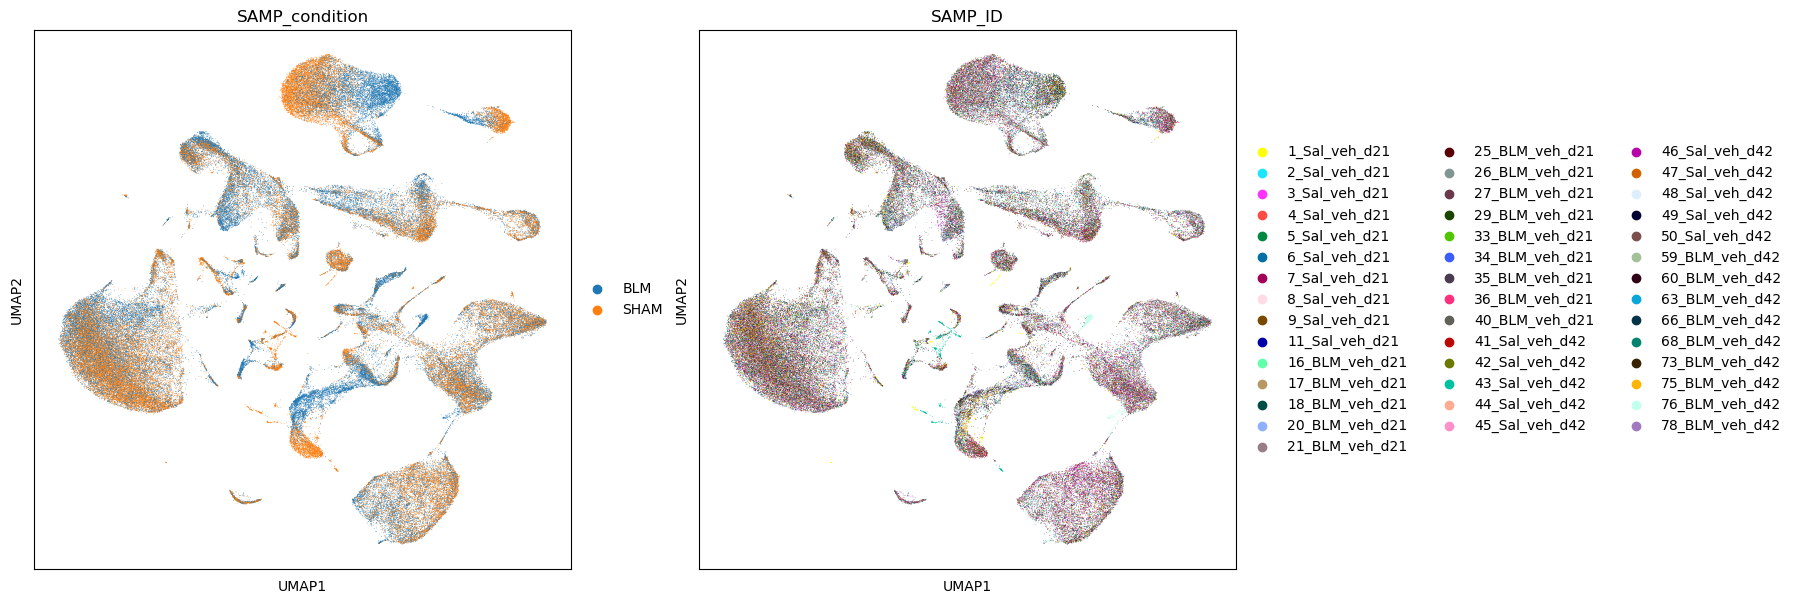

In [13]:
sc.pl.umap(adata, color=[ "SAMP_condition", "SAMP_ID"])

/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


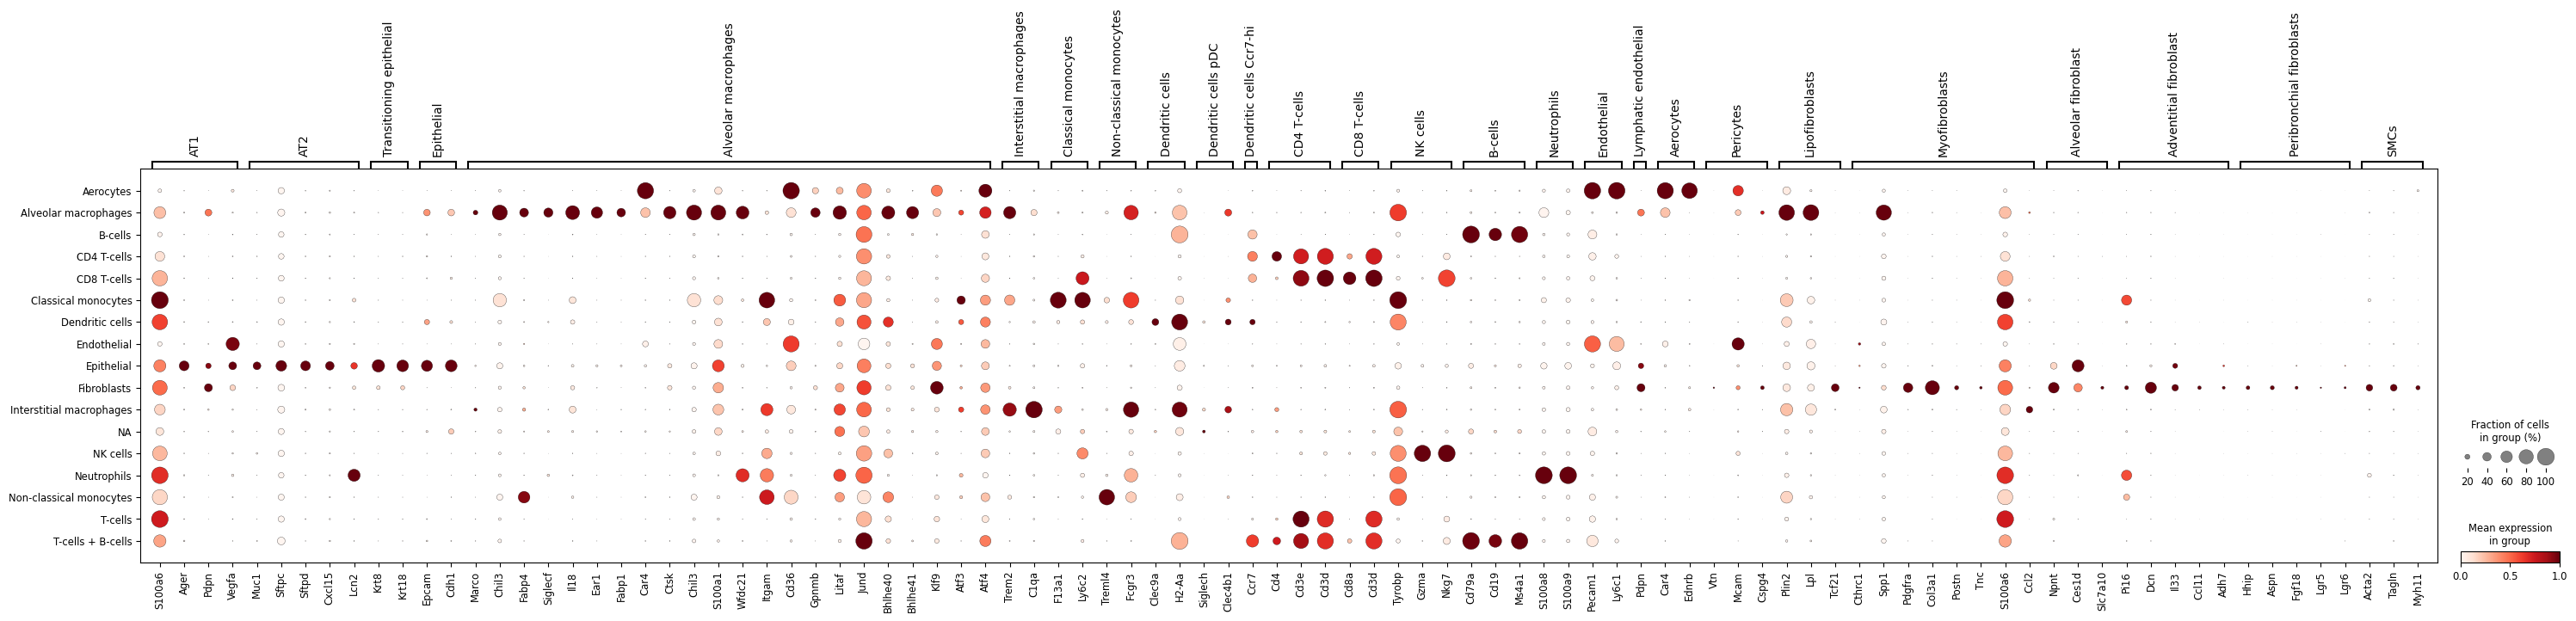

In [12]:
sc.pl.dotplot(adata, all_marker_genes, groupby=["manual_celltype_annotation"],  standard_scale="var")